In [2]:
# Import required libraries for ticker-wise analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready for ticker-wise stock analysis 📊")

Libraries imported successfully!
Ready for ticker-wise stock analysis 📊


In [3]:
# Load the stock data
print("Loading stock market data...")
df = pd.read_csv("/home/kibria/Desktop/IIT_Folders/6th_semester/AI/StockVision/data/processed/all_data.csv")
securities = pd.read_csv("/home/kibria/Desktop/IIT_Folders/6th_semester/AI/StockVision/data/processed/securities.csv")

# Clean and prepare data
df['date'] = pd.to_datetime(df['date'])
df['trading_code'] = df['trading_code'].str.strip()
securities['trading_code'] = securities['trading_code'].str.strip()

# Merge with securities data to get sector information
df = df.merge(securities, on='trading_code', how='left')

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique tickers: {df['trading_code'].nunique()}")
print(f"Available sectors: {df['sector'].unique()[:10]}...")  # Show first 10 sectors

# Display basic info
df.head()

Loading stock market data...
Dataset shape: (1791069, 13)
Date range: 2008-03-06 00:00:00 to 2022-12-29 00:00:00
Number of unique tickers: 1007
Available sectors: ['Pharmaceuticals & Chemicals' nan 'Financial Institutions'
 'Treasury Bond' 'Textile' 'Jute' 'Insurance' 'Bank' 'Food & Allied'
 'Fuel & Power']...
Dataset shape: (1791069, 13)
Date range: 2008-03-06 00:00:00 to 2022-12-29 00:00:00
Number of unique tickers: 1007
Available sectors: ['Pharmaceuticals & Chemicals' nan 'Financial Institutions'
 'Treasury Bond' 'Textile' 'Jute' 'Insurance' 'Bank' 'Food & Allied'
 'Fuel & Power']...


,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume,sector,instrument_type
0,2008-03-06,GLAXOSMITH,260.0,288.3,232.0,241.0,256.6,245.40,170,3.9074,14650,Pharmaceuticals & Chemicals,Equity
1,2008-03-06,RASPITDATA,0.0,0.0,0.0,3.5,3.5,3.50,0,0.0000,0,NaN,NaN
2,2008-03-06,PLFSL,302.5,306.0,297.0,297.0,303.5,302.25,108,2.8351,9400,Financial Institutions,Equity
3,2008-03-06,T10Y1016,0.0,0.0,0.0,100000.0,100000.0,100000.00,0,0.0000,0,Treasury Bond,Treasury Bond
4,2008-03-06,T20Y1227,0.0,0.0,0.0,100000.0,100000.0,100000.00,0,0.0000,0,Treasury Bond,Treasury Bond


# 📈 Ticker-Wise Stock Analysis

This notebook provides comprehensive analysis for individual stock tickers including:

## 🎯 Analysis Features:
- **Historical Price Analysis**: Price trends over the last N days
- **Technical Indicators**: Moving averages, volatility, price changes
- **Volume Analysis**: Trading volume patterns and trends
- **Performance Metrics**: Returns, risk metrics, and performance ratios
- **Comparative Analysis**: Compare multiple tickers
- **Sector Analysis**: Analyze stocks within specific sectors

## 📊 Visualization Types:
- Price and volume charts with multiple timeframes
- Technical indicator overlays
- Performance comparison charts
- Risk-return scatter plots
- Correlation heatmaps

In [4]:
# Function to get ticker information and statistics
def get_ticker_info(ticker_symbol, days=None):
    """
    Get basic information and statistics for a specific ticker
    
    Parameters:
    ticker_symbol (str): Stock ticker symbol
    days (int): Number of recent days to analyze (None for all data)
    
    Returns:
    dict: Ticker information and statistics
    """
    # Filter data for the specific ticker
    ticker_data = df[df['trading_code'] == ticker_symbol].copy()
    
    if ticker_data.empty:
        print(f"❌ No data found for ticker: {ticker_symbol}")
        return None
    
    # Sort by date
    ticker_data = ticker_data.sort_values('date')
    
    # Filter by days if specified
    if days is not None:
        cutoff_date = ticker_data['date'].max() - timedelta(days=days)
        ticker_data = ticker_data[ticker_data['date'] >= cutoff_date]
    
    # Calculate basic statistics
    stats = {
        'ticker': ticker_symbol,
        'sector': ticker_data['sector'].iloc[0] if not ticker_data['sector'].isna().all() else 'Unknown',
        'total_records': len(ticker_data),
        'date_range': f"{ticker_data['date'].min().strftime('%Y-%m-%d')} to {ticker_data['date'].max().strftime('%Y-%m-%d')}",
        'current_price': ticker_data['closing_price'].iloc[-1],
        'price_range': f"{ticker_data['closing_price'].min():.2f} - {ticker_data['closing_price'].max():.2f}",
        'avg_volume': ticker_data['volume'].mean(),
        'total_volume': ticker_data['volume'].sum(),
        'volatility': ticker_data['closing_price'].std(),
        'price_change_pct': ((ticker_data['closing_price'].iloc[-1] - ticker_data['closing_price'].iloc[0]) / ticker_data['closing_price'].iloc[0]) * 100
    }
    
    return stats, ticker_data

# Function to display available tickers by sector
def show_available_tickers(sector=None, limit=20):
    """Display available tickers, optionally filtered by sector"""
    if sector:
        filtered_tickers = df[df['sector'] == sector]['trading_code'].unique()
        print(f"📊 Available tickers in {sector} sector:")
    else:
        filtered_tickers = df['trading_code'].unique()
        print(f"📊 All available tickers (showing first {limit}):")
    
    tickers_list = sorted(filtered_tickers)[:limit]
    
    # Display in columns
    for i in range(0, len(tickers_list), 4):
        row = tickers_list[i:i+4]
        print("  ".join(f"{ticker:<12}" for ticker in row))
    
    print(f"\nTotal tickers: {len(filtered_tickers)}")
    return filtered_tickers

# Show available sectors
print("🏢 Available Sectors:")
sectors = df['sector'].dropna().unique()
for i, sector in enumerate(sorted(sectors), 1):
    print(f"{i:2d}. {sector}")

print(f"\nTotal sectors: {len(sectors)}")

🏢 Available Sectors:
 1. Bank
 2. Cement
 3. Ceramics Sector
 4. Corporate Bond
 5. Debenture
 6. Engineering
 7. Financial Institutions
 8. Food & Allied
 9. Fuel & Power
10. IT Sector
11. Insurance
12. Jute
13. Miscellaneous
14. Mutual Funds
15. Paper & Printing
16. Pharmaceuticals & Chemicals
17. Services & Real Estate
18. Tannery Industries
19. Telecommunication
20. Textile
21. Travel & Leisure
22. Treasury Bond

Total sectors: 22


In [5]:
# Comprehensive ticker analysis function
def analyze_ticker(ticker_symbol, days=90):
    """
    Comprehensive analysis of a ticker with visualizations
    
    Parameters:
    ticker_symbol (str): Stock ticker symbol
    days (int): Number of recent days to analyze
    """
    
    # Get ticker data and stats
    result = get_ticker_info(ticker_symbol, days)
    if result is None:
        return
    
    stats, ticker_data = result
    
    # Display basic information
    print(f"📊 ANALYSIS FOR {ticker_symbol}")
    print("=" * 50)
    print(f"Sector: {stats['sector']}")
    print(f"Date Range: {stats['date_range']}")
    print(f"Total Records: {stats['total_records']}")
    print(f"Current Price: ${stats['current_price']:.2f}")
    print(f"Price Range: ${stats['price_range']}")
    print(f"Price Change: {stats['price_change_pct']:.2f}%")
    print(f"Average Volume: {stats['avg_volume']:,.0f}")
    print(f"Volatility (Std): ${stats['volatility']:.2f}")
    
    # Calculate technical indicators
    ticker_data = ticker_data.copy()
    ticker_data['MA_5'] = ticker_data['closing_price'].rolling(window=5).mean()
    ticker_data['MA_20'] = ticker_data['closing_price'].rolling(window=20).mean()
    ticker_data['MA_50'] = ticker_data['closing_price'].rolling(window=50).mean()
    ticker_data['Daily_Return'] = ticker_data['closing_price'].pct_change()
    ticker_data['Volatility_20'] = ticker_data['Daily_Return'].rolling(window=20).std()
    ticker_data['Price_Change'] = ticker_data['closing_price'].diff()
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{ticker_symbol} - Comprehensive Analysis (Last {days} days)', fontsize=16, fontweight='bold')
    
    # 1. Price Chart with Moving Averages
    ax1 = axes[0, 0]
    ax1.plot(ticker_data['date'], ticker_data['closing_price'], label='Close Price', linewidth=2, color='blue')
    ax1.plot(ticker_data['date'], ticker_data['MA_5'], label='MA 5', alpha=0.7, color='orange')
    ax1.plot(ticker_data['date'], ticker_data['MA_20'], label='MA 20', alpha=0.7, color='green')
    if len(ticker_data) >= 50:
        ax1.plot(ticker_data['date'], ticker_data['MA_50'], label='MA 50', alpha=0.7, color='red')
    
    ax1.set_title('Price with Moving Averages', fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Volume Analysis
    ax2 = axes[0, 1]
    bars = ax2.bar(ticker_data['date'], ticker_data['volume'], alpha=0.7, color='purple')
    ax2.axhline(y=ticker_data['volume'].mean(), color='red', linestyle='--', label=f'Avg Volume: {ticker_data["volume"].mean():,.0f}')
    ax2.set_title('Trading Volume', fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Daily Returns Distribution
    ax3 = axes[1, 0]
    returns = ticker_data['Daily_Return'].dropna()
    ax3.hist(returns, bins=30, alpha=0.7, color='green', edgecolor='black')
    ax3.axvline(returns.mean(), color='red', linestyle='--', label=f'Mean: {returns.mean():.4f}')
    ax3.axvline(0, color='black', linestyle='-', alpha=0.5)
    ax3.set_title('Daily Returns Distribution', fontweight='bold')
    ax3.set_xlabel('Daily Return')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Price vs Volume Correlation
    ax4 = axes[1, 1]
    scatter = ax4.scatter(ticker_data['volume'], ticker_data['closing_price'], 
                         c=ticker_data['Price_Change'], cmap='RdYlGn', alpha=0.7)
    ax4.set_title('Price vs Volume (Color = Price Change)', fontweight='bold')
    ax4.set_xlabel('Volume')
    ax4.set_ylabel('Price ($)')
    plt.colorbar(scatter, ax=ax4, label='Price Change ($)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional Statistics
    print(f"\\n📈 TECHNICAL ANALYSIS")
    print("=" * 30)
    
    if len(ticker_data) >= 5:
        current_ma5 = ticker_data['MA_5'].iloc[-1]
        current_price = ticker_data['closing_price'].iloc[-1]
        print(f"Current vs MA5: {'📈 Above' if current_price > current_ma5 else '📉 Below'} (${current_ma5:.2f})")
    
    if len(ticker_data) >= 20:
        current_ma20 = ticker_data['MA_20'].iloc[-1]
        print(f"Current vs MA20: {'📈 Above' if current_price > current_ma20 else '📉 Below'} (${current_ma20:.2f})")
    
    # Risk metrics
    if len(returns) > 0:
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252) if returns.std() > 0 else 0
        print(f"\\n📊 RISK METRICS")
        print("=" * 20)
        print(f"Daily Volatility: {returns.std():.4f}")
        print(f"Annualized Volatility: {returns.std() * np.sqrt(252):.4f}")
        print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
        
        # Best and worst days
        best_day = ticker_data.loc[returns.idxmax(), 'date'] if not returns.empty else None
        worst_day = ticker_data.loc[returns.idxmin(), 'date'] if not returns.empty else None
        print(f"Best Day: {best_day.strftime('%Y-%m-%d') if best_day else 'N/A'} ({returns.max():.4f})")
        print(f"Worst Day: {worst_day.strftime('%Y-%m-%d') if worst_day else 'N/A'} ({returns.min():.4f})")
    
    return ticker_data, stats

print("✅ Ticker analysis function ready!")

✅ Ticker analysis function ready!


🔍 Sample of available tickers:
📊 All available tickers (showing first 16):
1JANATAMF     1STBSRS       1STICB        1STPRIMFMF  
2NDICB        3RDICB        4THICB        5THICB      
6THICB        7THICB        8THICB        AAMRANET    
AAMRATECH     ABB1STMF      ABBANK        ACFL        

Total tickers: 1007
\n🎯 Analyzing ABBANK for the last 180 days...
📊 ANALYSIS FOR ABBANK
Sector: Bank
Date Range: 2022-07-03 to 2022-12-29
Total Records: 122
Current Price: $9.90
Price Range: $9.80 - 10.80
Price Change: -4.81%
Average Volume: 444,016
Volatility (Std): $0.22


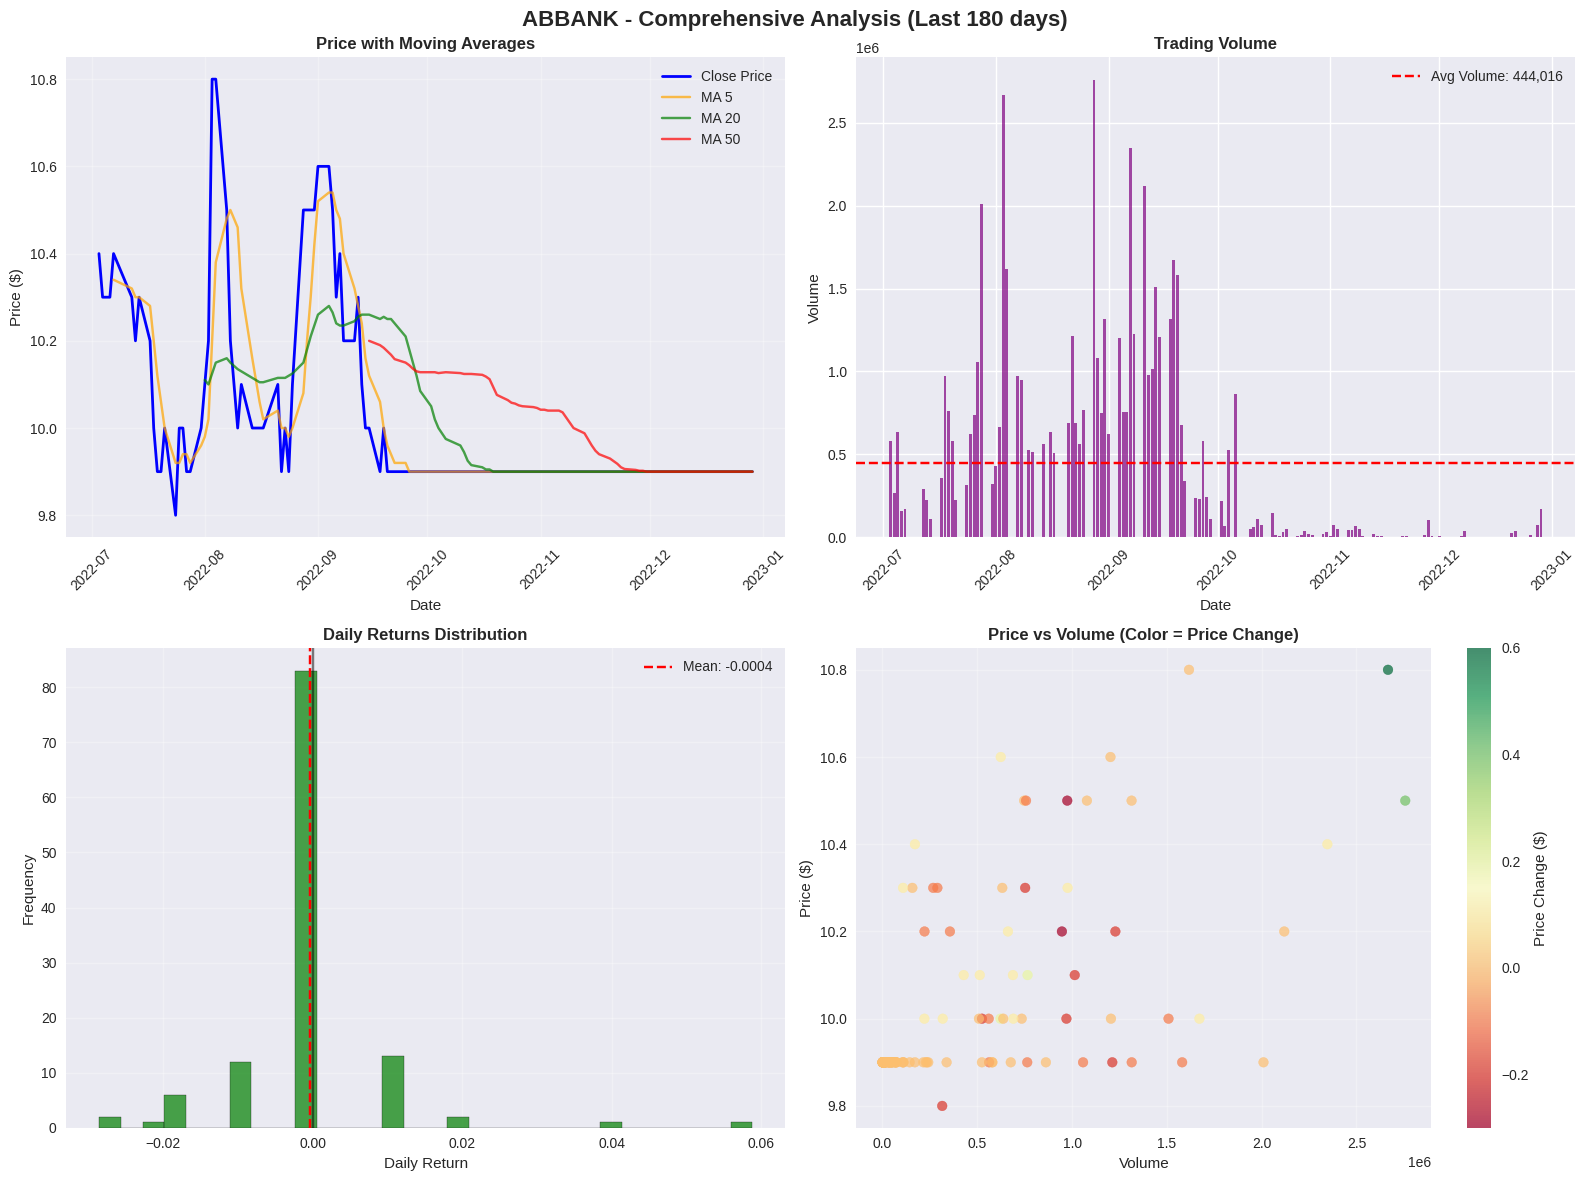

\n📈 TECHNICAL ANALYSIS
Current vs MA5: 📉 Below ($9.90)
Current vs MA20: 📉 Below ($9.90)
\n📊 RISK METRICS
Daily Volatility: 0.0102
Annualized Volatility: 0.1622
Sharpe Ratio: -0.5527
Best Day: 2022-08-03 (0.0588)
Worst Day: 2022-08-08 (-0.0286)


In [10]:
# Example usage - analyze a specific ticker
# Choose a ticker to analyze (you can change this)

# First, let's see some available tickers
print("🔍 Sample of available tickers:")
sample_tickers = show_available_tickers(limit=16)

# Example analysis - you can change 'ABBANK' to any available ticker
TICKER_TO_ANALYZE = 'ABBANK'  # Change this to analyze different ticker
ANALYSIS_DAYS = 180  # Last 6 months

print(f"\\n🎯 Analyzing {TICKER_TO_ANALYZE} for the last {ANALYSIS_DAYS} days...")
ticker_data, stats = analyze_ticker(TICKER_TO_ANALYZE, days=ANALYSIS_DAYS)

In [11]:
# Function to compare multiple tickers
def compare_tickers(ticker_list, days=90):
    """
    Compare multiple tickers side by side
    
    Parameters:
    ticker_list (list): List of ticker symbols to compare
    days (int): Number of recent days to analyze
    """
    
    if len(ticker_list) < 2:
        print("❌ Please provide at least 2 tickers for comparison")
        return
    
    print(f"📊 COMPARING {len(ticker_list)} TICKERS")
    print("=" * 50)
    
    ticker_data_dict = {}
    comparison_stats = []
    
    # Collect data for all tickers
    for ticker in ticker_list:
        result = get_ticker_info(ticker, days)
        if result is not None:
            stats, data = result
            ticker_data_dict[ticker] = data
            comparison_stats.append(stats)
        else:
            print(f"⚠️  Skipping {ticker} - no data found")
    
    if len(ticker_data_dict) < 2:
        print("❌ Not enough valid tickers for comparison")
        return
    
    # Create comparison visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Ticker Comparison - Last {days} days', fontsize=16, fontweight='bold')
    
    # 1. Normalized Price Comparison
    ax1 = axes[0, 0]
    for ticker, data in ticker_data_dict.items():
        # Normalize prices to start from 100
        normalized_prices = (data['closing_price'] / data['closing_price'].iloc[0]) * 100
        ax1.plot(data['date'], normalized_prices, label=ticker, linewidth=2)
    
    ax1.set_title('Normalized Price Performance (Base = 100)', fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Normalized Price')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Volume Comparison
    ax2 = axes[0, 1]
    for ticker, data in ticker_data_dict.items():
        ax2.plot(data['date'], data['volume'], label=ticker, alpha=0.7)
    
    ax2.set_title('Volume Comparison', fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Daily Returns Comparison
    ax3 = axes[1, 0]
    for ticker, data in ticker_data_dict.items():
        returns = data['closing_price'].pct_change().dropna()
        ax3.hist(returns, bins=20, alpha=0.6, label=ticker, density=True)
    
    ax3.set_title('Daily Returns Distribution', fontweight='bold')
    ax3.set_xlabel('Daily Return')
    ax3.set_ylabel('Density')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Risk-Return Scatter Plot
    ax4 = axes[1, 1]
    returns_data = []
    volatility_data = []
    ticker_names = []
    
    for ticker, data in ticker_data_dict.items():
        returns = data['closing_price'].pct_change().dropna()
        if len(returns) > 1:
            avg_return = returns.mean() * 252  # Annualized
            volatility = returns.std() * np.sqrt(252)  # Annualized
            returns_data.append(avg_return)
            volatility_data.append(volatility)
            ticker_names.append(ticker)
    
    scatter = ax4.scatter(volatility_data, returns_data, s=100, alpha=0.7)
    for i, ticker in enumerate(ticker_names):
        ax4.annotate(ticker, (volatility_data[i], returns_data[i]), 
                    xytext=(5, 5), textcoords='offset points')
    
    ax4.set_title('Risk vs Return (Annualized)', fontweight='bold')
    ax4.set_xlabel('Volatility (Risk)')
    ax4.set_ylabel('Average Return')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Comparison table
    print(f"\\n📊 COMPARISON SUMMARY")
    print("=" * 80)
    
    comparison_df = pd.DataFrame(comparison_stats)
    comparison_df = comparison_df[['ticker', 'sector', 'current_price', 'price_change_pct', 
                                 'volatility', 'avg_volume']].round(2)
    
    print(comparison_df.to_string(index=False))
    
    # Performance ranking
    print(f"\\n🏆 PERFORMANCE RANKING (by price change %)")
    print("=" * 50)
    ranked = comparison_df.sort_values('price_change_pct', ascending=False)
    for i, (_, row) in enumerate(ranked.iterrows(), 1):
        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i}."
        print(f"{emoji} {row['ticker']}: {row['price_change_pct']:.2f}%")
    
    return ticker_data_dict, comparison_df

print("✅ Ticker comparison function ready!")

✅ Ticker comparison function ready!


🔄 Comparing tickers: ABBANK, ACI, ACFL, AAMRATECH
📊 COMPARING 4 TICKERS


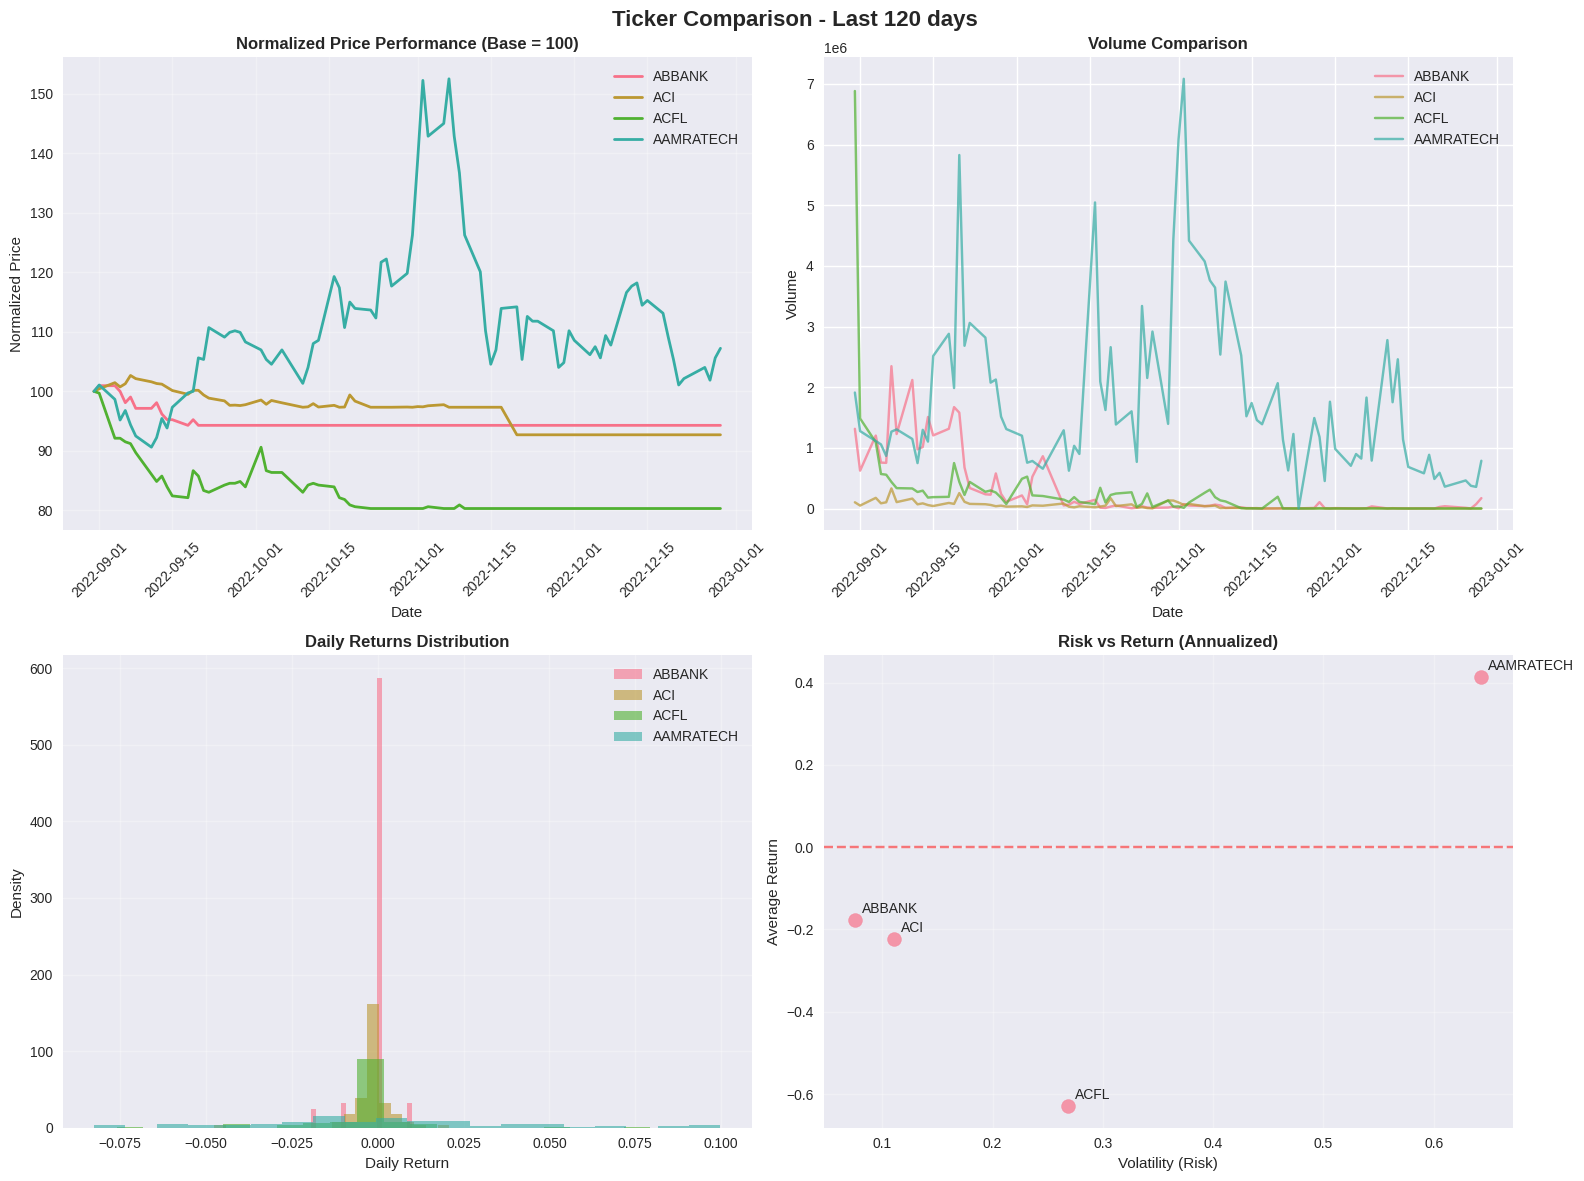

\n📊 COMPARISON SUMMARY
   ticker                      sector  current_price  price_change_pct  volatility  avg_volume
   ABBANK                        Bank            9.9             -5.71        0.16   300629.55
      ACI Pharmaceuticals & Chemicals          260.2             -7.30        8.66    43631.27
     ACFL                     Textile           26.5            -19.70        1.37   248795.88
AAMRATECH                   IT Sector           40.0              7.24        4.75  1811762.07
\n🏆 PERFORMANCE RANKING (by price change %)
🥇 AAMRATECH: 7.24%
🥈 ABBANK: -5.71%
🥉 ACI: -7.30%
4. ACFL: -19.70%


In [12]:
# Example: Compare multiple tickers
# You can modify this list to compare different stocks

TICKERS_TO_COMPARE = ['ABBANK', 'ACI', 'ACFL', 'AAMRATECH']  # Change these tickers
COMPARISON_DAYS = 120  # Last 4 months

print(f"🔄 Comparing tickers: {', '.join(TICKERS_TO_COMPARE)}")
comparison_data, comparison_summary = compare_tickers(TICKERS_TO_COMPARE, days=COMPARISON_DAYS)

In [13]:
# Sector-wise analysis function
def analyze_sector(sector_name, days=90, top_n=10):
    """
    Analyze top performing stocks in a specific sector
    
    Parameters:
    sector_name (str): Name of the sector to analyze
    days (int): Number of recent days to analyze
    top_n (int): Number of top stocks to analyze
    """
    
    print(f"🏢 SECTOR ANALYSIS: {sector_name}")
    print("=" * 60)
    
    # Get all tickers in the sector
    sector_tickers = df[df['sector'] == sector_name]['trading_code'].unique()
    
    if len(sector_tickers) == 0:
        print(f"❌ No tickers found for sector: {sector_name}")
        return
    
    print(f"Found {len(sector_tickers)} tickers in {sector_name} sector")
    
    # Analyze each ticker and collect performance data
    sector_performance = []
    
    for ticker in sector_tickers:
        result = get_ticker_info(ticker, days)
        if result is not None:
            stats, data = result
            if len(data) > 0:
                sector_performance.append({
                    'ticker': ticker,
                    'price_change_pct': stats['price_change_pct'],
                    'current_price': stats['current_price'],
                    'volatility': stats['volatility'],
                    'avg_volume': stats['avg_volume'],
                    'total_records': stats['total_records']
                })
    
    if len(sector_performance) == 0:
        print(f"❌ No valid data found for {sector_name} sector")
        return
    
    # Create DataFrame and sort by performance
    sector_df = pd.DataFrame(sector_performance)
    sector_df = sector_df.sort_values('price_change_pct', ascending=False)
    
    # Take top N performers
    top_performers = sector_df.head(top_n)
    
    print(f"\\n🏆 TOP {len(top_performers)} PERFORMERS IN {sector_name}")
    print("=" * 60)
    print(top_performers[['ticker', 'price_change_pct', 'current_price', 'volatility']].to_string(index=False))
    
    # Visualize sector performance
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{sector_name} Sector Analysis - Last {days} days', fontsize=16, fontweight='bold')
    
    # 1. Performance Bar Chart
    ax1 = axes[0, 0]
    colors = ['green' if x > 0 else 'red' for x in top_performers['price_change_pct']]
    bars = ax1.bar(range(len(top_performers)), top_performers['price_change_pct'], color=colors, alpha=0.7)
    ax1.set_title(f'Top {top_n} Price Performance (%)', fontweight='bold')
    ax1.set_xlabel('Stocks')
    ax1.set_ylabel('Price Change (%)')
    ax1.set_xticks(range(len(top_performers)))
    ax1.set_xticklabels(top_performers['ticker'], rotation=45)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top_performers['price_change_pct'])):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + (0.5 if height > 0 else -1),
                f'{value:.1f}%', ha='center', va='bottom' if height > 0 else 'top')
    
    # 2. Risk vs Return Scatter
    ax2 = axes[0, 1]
    scatter = ax2.scatter(sector_df['volatility'], sector_df['price_change_pct'], 
                         s=sector_df['avg_volume']/1000, alpha=0.6, c=sector_df['price_change_pct'], 
                         cmap='RdYlGn')
    ax2.set_title('Risk vs Return (Size = Avg Volume)', fontweight='bold')
    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Price Change (%)')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax2, label='Price Change (%)')
    
    # Add ticker labels for top performers
    for _, row in top_performers.head(5).iterrows():
        ax2.annotate(row['ticker'], (row['volatility'], row['price_change_pct']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Volume Distribution
    ax3 = axes[1, 0]
    ax3.hist(sector_df['avg_volume'], bins=15, alpha=0.7, color='blue', edgecolor='black')
    ax3.axvline(sector_df['avg_volume'].mean(), color='red', linestyle='--', 
               label=f'Mean: {sector_df["avg_volume"].mean():,.0f}')
    ax3.set_title('Average Volume Distribution', fontweight='bold')
    ax3.set_xlabel('Average Volume')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Price Range Analysis
    ax4 = axes[1, 1]
    price_ranges = []
    ticker_names = []
    
    for ticker in top_performers['ticker']:
        result = get_ticker_info(ticker, days)
        if result is not None:
            _, data = result
            price_range = data['closing_price'].max() - data['closing_price'].min()
            price_ranges.append(price_range)
            ticker_names.append(ticker)
    
    if price_ranges:
        bars = ax4.bar(range(len(price_ranges)), price_ranges, alpha=0.7, color='orange')
        ax4.set_title('Price Range (Max - Min)', fontweight='bold')
        ax4.set_xlabel('Stocks')
        ax4.set_ylabel('Price Range ($)')
        ax4.set_xticks(range(len(ticker_names)))
        ax4.set_xticklabels(ticker_names, rotation=45)
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Sector summary statistics
    print(f"\\n📊 SECTOR SUMMARY STATISTICS")
    print("=" * 40)
    print(f"Total stocks analyzed: {len(sector_df)}")
    print(f"Average price change: {sector_df['price_change_pct'].mean():.2f}%")
    print(f"Best performer: {sector_df.iloc[0]['ticker']} (+{sector_df.iloc[0]['price_change_pct']:.2f}%)") 
    print(f"Worst performer: {sector_df.iloc[-1]['ticker']} ({sector_df.iloc[-1]['price_change_pct']:.2f}%)")
    print(f"Average volatility: ${sector_df['volatility'].mean():.2f}")
    print(f"Total sector volume: {sector_df['avg_volume'].sum():,.0f}")
    
    return sector_df, top_performers

print("✅ Sector analysis function ready!")

✅ Sector analysis function ready!


🏢 Analyzing Bank sector...
🏢 SECTOR ANALYSIS: Bank
Found 30 tickers in Bank sector
\n🏆 TOP 8 PERFORMERS IN Bank
    ticker  price_change_pct  current_price   volatility
PREMIERBAN          2.307692           13.3 1.198006e-01
ISLAMIBANK          0.609756           33.0 1.586564e-01
       MTB          0.602410           16.7 1.713248e-01
   NCCBANK          0.000000           13.8 1.781270e-02
  BANKASIA          0.000000           20.2 2.821126e-02
 TRUSTBANK          0.000000           34.9 2.540003e-02
       NBL          0.000000            8.3 0.000000e+00
  ICBIBANK          0.000000            5.4 2.686287e-15


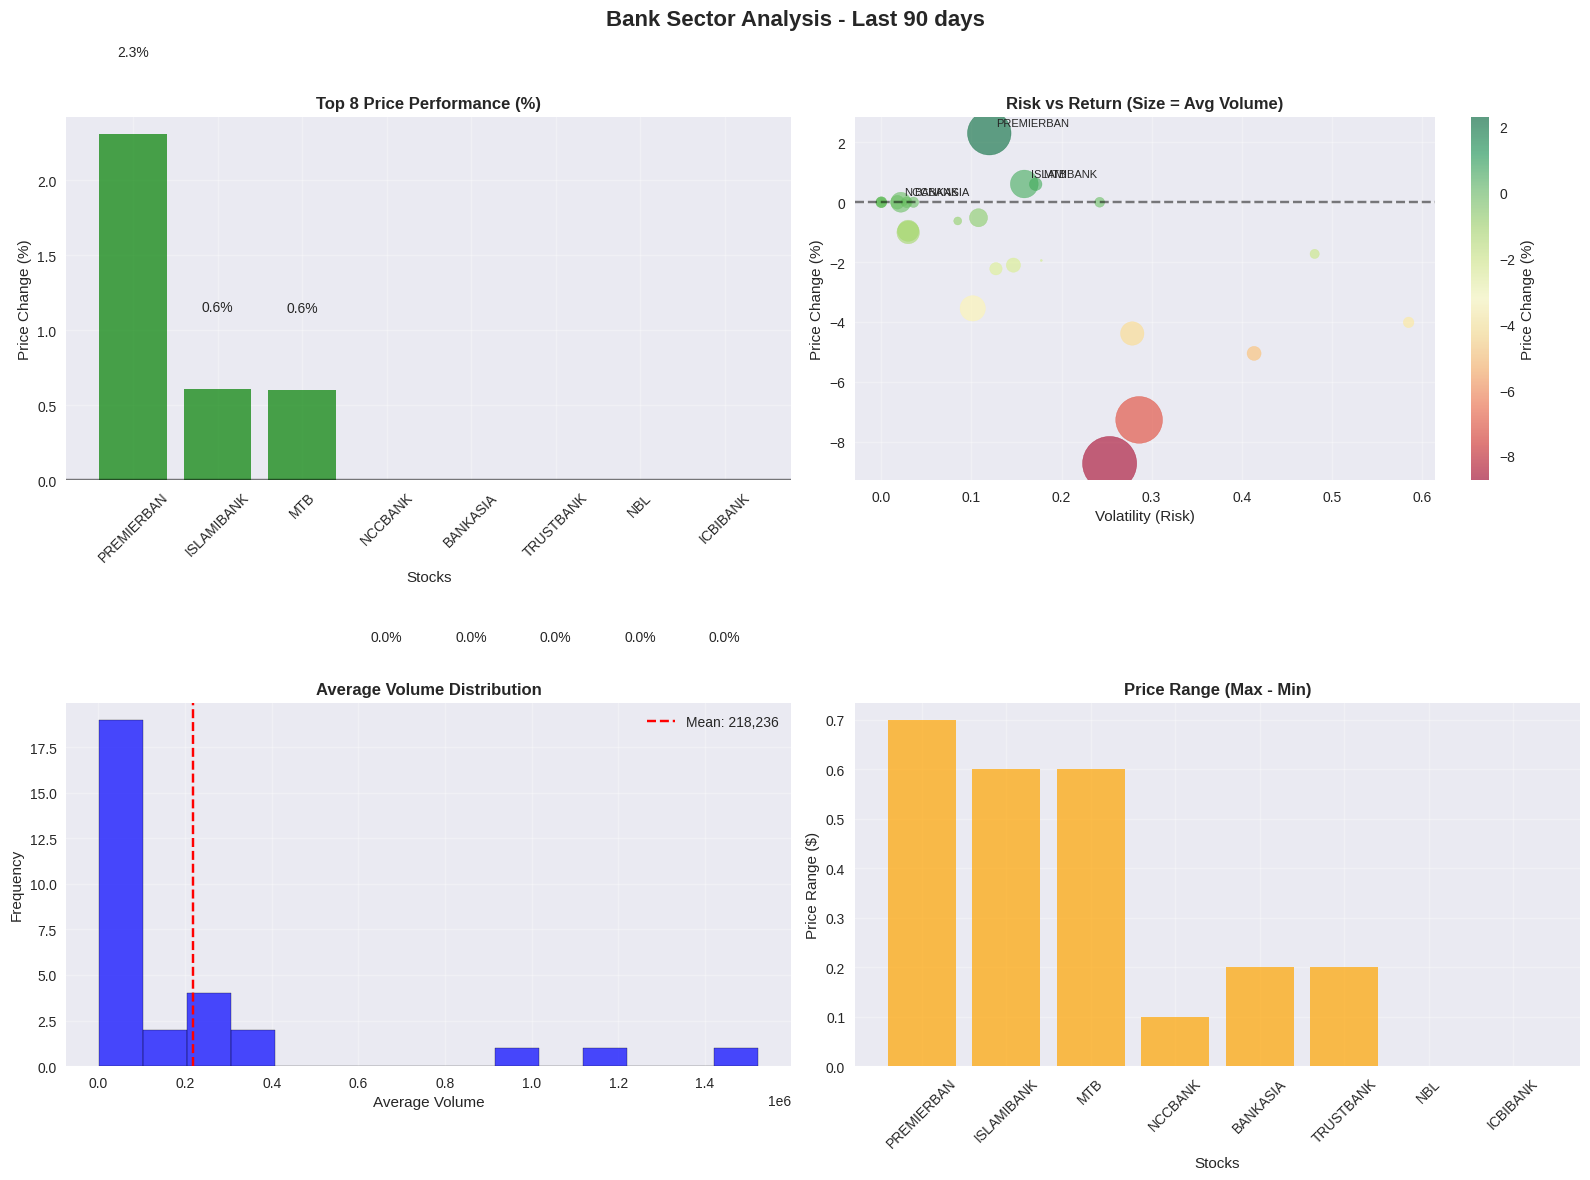

\n📊 SECTOR SUMMARY STATISTICS
Total stocks analyzed: 30
Average price change: -1.35%
Best performer: PREMIERBAN (+2.31%)
Worst performer: IFIC (-8.73%)
Average volatility: $0.13
Total sector volume: 6,547,087


In [14]:
# Example: Analyze a specific sector
# Choose a sector to analyze (you can change this)

SECTOR_TO_ANALYZE = 'Bank'  # Change this to analyze different sector
ANALYSIS_DAYS = 90  # Last 3 months
TOP_STOCKS = 8  # Number of top performers to show

print(f"🏢 Analyzing {SECTOR_TO_ANALYZE} sector...")
sector_data, top_performers = analyze_sector(SECTOR_TO_ANALYZE, days=ANALYSIS_DAYS, top_n=TOP_STOCKS)

# 🎯 Custom Analysis Template

Use the cells below to perform your own custom analysis:

## 📋 Quick Usage Guide:

### 1. **Single Ticker Analysis:**
```python
# Analyze any ticker for the last N days
analyze_ticker('TICKER_NAME', days=90)
```

### 2. **Compare Multiple Tickers:**
```python
# Compare performance of multiple tickers
compare_tickers(['TICKER1', 'TICKER2', 'TICKER3'], days=90)
```

### 3. **Sector Analysis:**
```python
# Analyze top performers in a sector
analyze_sector('SECTOR_NAME', days=90, top_n=10)
```

### 4. **Available Functions:**
- `show_available_tickers()` - Show all available tickers
- `get_ticker_info(ticker, days)` - Get basic ticker statistics
- `analyze_ticker(ticker, days)` - Comprehensive single ticker analysis
- `compare_tickers(ticker_list, days)` - Compare multiple tickers
- `analyze_sector(sector, days, top_n)` - Analyze sector performance

## 💡 **Analysis Ideas:**
- Compare tickers within the same sector
- Analyze seasonal trends by changing the date range
- Find the most volatile stocks in a sector
- Identify stocks with unusual volume patterns
- Compare performance across different market periods

In [15]:
# 🔬 YOUR CUSTOM ANALYSIS
# Use this cell to perform your own analysis

# Example 1: Analyze a specific ticker you're interested in
# analyze_ticker('YOUR_TICKER_HERE', days=120)

# Example 2: Compare tickers from different sectors
# compare_tickers(['BANK_TICKER', 'TECH_TICKER', 'PHARMA_TICKER'], days=90)

# Example 3: Find the best performing sector
# analyze_sector('IT Sector', days=180, top_n=5)

# Example 4: Custom analysis - Find most volatile stocks
def find_most_volatile_stocks(sector=None, days=90, top_n=10):
    """Find the most volatile stocks"""
    
    if sector:
        tickers = df[df['sector'] == sector]['trading_code'].unique()
        print(f"🔍 Finding most volatile stocks in {sector} sector...")
    else:
        tickers = df['trading_code'].unique()
        print(f"🔍 Finding most volatile stocks across all sectors...")
    
    volatility_data = []
    
    for ticker in tickers[:50]:  # Limit to first 50 for performance
        result = get_ticker_info(ticker, days)
        if result is not None:
            stats, data = result
            if len(data) > 10:  # Need enough data points
                returns = data['closing_price'].pct_change().dropna()
                if len(returns) > 0:
                    volatility = returns.std()
                    volatility_data.append({
                        'ticker': ticker,
                        'volatility': volatility,
                        'sector': stats['sector'],
                        'price_change_pct': stats['price_change_pct']
                    })
    
    if volatility_data:
        vol_df = pd.DataFrame(volatility_data)
        vol_df = vol_df.sort_values('volatility', ascending=False).head(top_n)
        
        print(f"\\n🌪️  TOP {top_n} MOST VOLATILE STOCKS")
        print("=" * 50)
        print(vol_df[['ticker', 'sector', 'volatility', 'price_change_pct']].round(4).to_string(index=False))
        
        # Visualize
        plt.figure(figsize=(12, 6))
        colors = ['red' if x < 0 else 'green' for x in vol_df['price_change_pct']]
        bars = plt.bar(vol_df['ticker'], vol_df['volatility'], color=colors, alpha=0.7)
        plt.title(f'Top {top_n} Most Volatile Stocks (Last {days} days)', fontweight='bold')
        plt.xlabel('Ticker')
        plt.ylabel('Volatility (Daily Return Std)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, vol in zip(bars, vol_df['volatility']):
            plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + vol*0.01,
                    f'{vol:.4f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        return vol_df
    else:
        print("❌ No volatility data found")
        return None

# Uncomment to run volatility analysis
# volatile_stocks = find_most_volatile_stocks(days=120, top_n=10)

print("✅ Custom analysis template ready! Uncomment and modify the examples above to run your analysis.")

✅ Custom analysis template ready! Uncomment and modify the examples above to run your analysis.
